In [98]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import pandas library, read and have an overall look at the dataset.

In [99]:
import pandas as pd
df =pd.read_csv('train.csv')
print(df.shape)
df.head(5)

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Get an idea of the distribution the statistical dataset.

In [100]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [101]:
string_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
continuous_columns = ['LoanAmount', 'ApplicantIncome', 'CoapplicantIncome']
for i in string_columns:
    print('\n', i, '\n', 'Missing values:', df[i].isnull().sum(), sep='')
    print('Proportion:\n', df[i].value_counts(normalize=True)*100, sep='')
for i in continuous_columns:
    print('\n', i, ': Missing values: ', df[i].isnull().sum(), sep='')


Gender
Missing values:13
Proportion:
Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

Married
Missing values:3
Proportion:
Yes    65.139116
No     34.860884
Name: Married, dtype: float64

Education
Missing values:0
Proportion:
Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

Self_Employed
Missing values:32
Proportion:
No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

Property_Area
Missing values:0
Proportion:
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

LoanAmount: Missing values: 22

ApplicantIncome: Missing values: 0

CoapplicantIncome: Missing values: 0


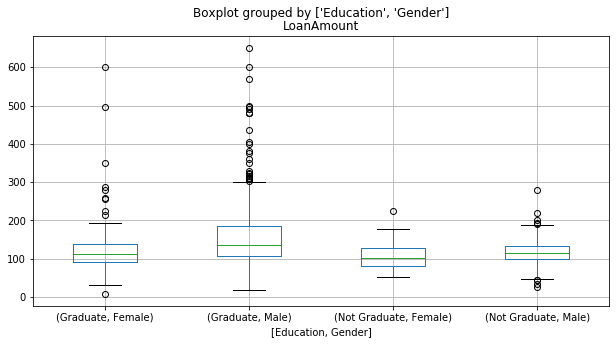

In [102]:
df.boxplot(column='LoanAmount', by = ['Education', 'Gender'], figsize=(10, 5))

In [103]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index='Credit_History', aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean())
print('frequency table for credit history')
print(temp1)
print('Probability of getting loan for each credit history class')
print(temp2)

frequency table for credit history
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting loan for each credit history class
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0, 0.5, 'Probability of loan approval')

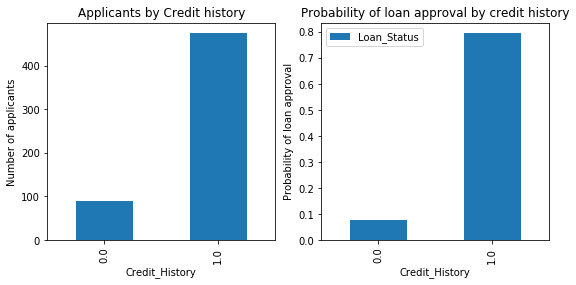

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9, 4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Number of applicants')
ax1.set_title('Applicants by Credit history')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2 = temp2.plot(kind='bar', ax=ax2, title="Probability of loan approval by credit history")
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of loan approval')
# ax2.set_title('Probability of getting loan by credit history')


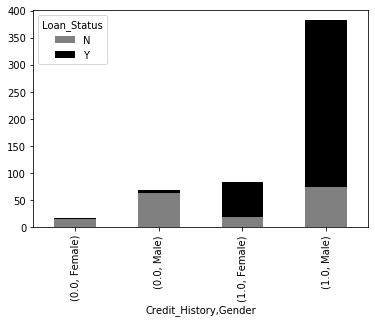

In [105]:
temp5 =pd.crosstab([df.Credit_History, df.Gender], df.Loan_Status)
temp5.plot(kind='bar', stacked=True, color=['grey', 'black'], grid=False)

In [106]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

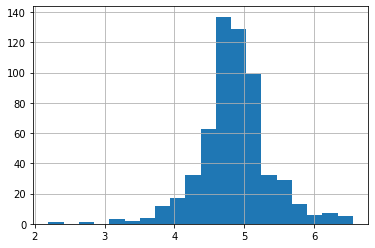

In [107]:
df['LoanAmount_log'] = np.log(df.LoanAmount)
df.LoanAmount_log.hist(bins=20)

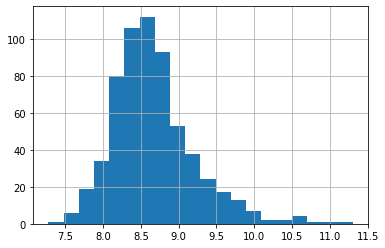

In [108]:
df['TotalIncome'] = df.ApplicantIncome + df.CoapplicantIncome
df['TotalIncome_log'] = np.log(df.TotalIncome)
df.TotalIncome_log.hist(bins=20)